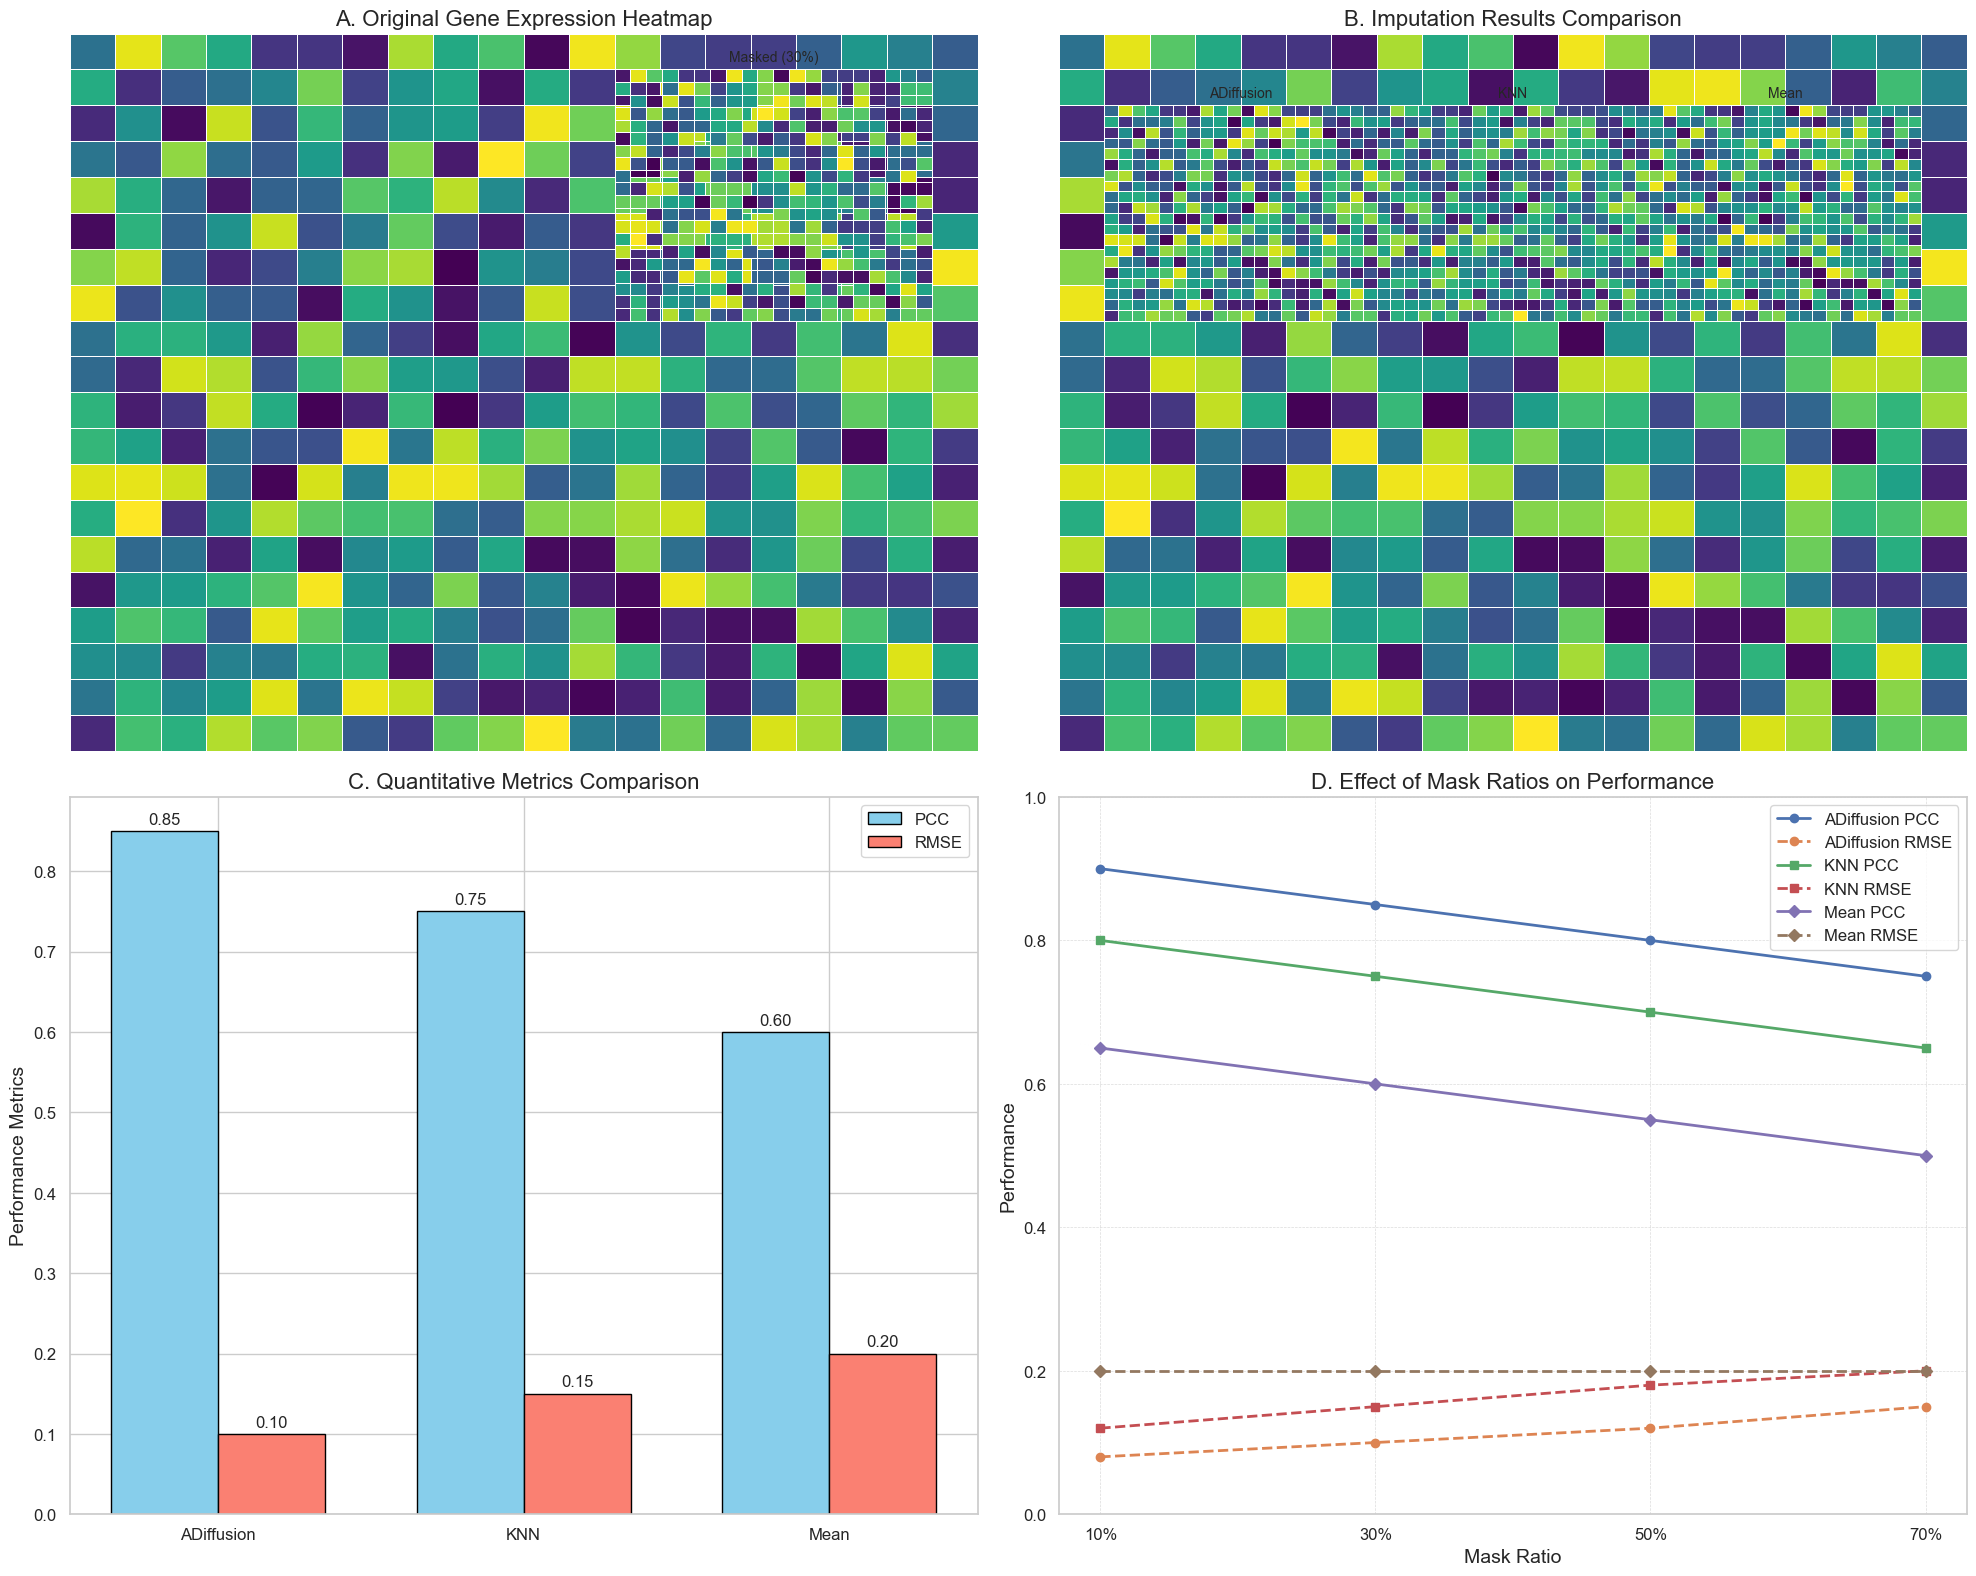

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Set aesthetic parameters for publication quality
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams.update({
    'figure.figsize': (20, 16),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.family': 'Arial',
    'pdf.fonttype': 42,  # To ensure text is editable in vector formats
    'ps.fonttype': 42
})

# Set random seed for reproducibility
np.random.seed(42)

# Panel A: Original and Masked Heatmap
def generate_heatmap_data(size=20):
    """Generate synthetic gene expression data."""
    return np.random.rand(size, size)

def mask_data(data, mask_ratio):
    """Randomly mask a fraction of the data."""
    masked_data = data.copy()
    mask = np.random.rand(*data.shape) < mask_ratio
    masked_data[mask] = np.nan
    return masked_data, mask

# Generate original data
original_data = generate_heatmap_data()

# Apply masking
mask_ratio_A = 0.3
masked_data_A, mask_A = mask_data(original_data, mask_ratio_A)

# Panel B: Imputation Results Comparison
def impute_data(method, data, mask, original):
    """Simulate imputed data for different methods."""
    imputed = data.copy()
    # Simple imputation strategies for illustration
    if method == 'ADiffusion':
        # ADiffusion: more accurate imputation (less error)
        imputed[mask] = original[mask] + np.random.normal(0, 0.05, size=np.sum(mask))
    elif method == 'KNN':
        imputed[mask] = original[mask] + np.random.normal(0, 0.1, size=np.sum(mask))
    elif method == 'Mean':
        mean_val = np.nanmean(data)
        imputed[mask] = mean_val + np.random.normal(0, 0.1, size=np.sum(mask))
    else:
        imputed[mask] = original[mask]  # No imputation
    return imputed

methods = ['ADiffusion', 'KNN', 'Mean']
imputed_results = {method: impute_data(method, masked_data_A, mask_A, original_data) for method in methods}

# Panel C: Quantitative Metrics Comparison
# Generate synthetic metrics
metrics = ['PCC', 'RMSE']
methods_for_metrics = ['ADiffusion', 'KNN', 'Mean']
metrics_values = {
    'ADiffusion': {'PCC': 0.85, 'RMSE': 0.10},
    'KNN': {'PCC': 0.75, 'RMSE': 0.15},
    'Mean': {'PCC': 0.60, 'RMSE': 0.20},
}

# Panel D: Effect of Different Mask Ratios on Performance
mask_ratios = [0.1, 0.3, 0.5, 0.7]
performance_pcc = {
    'ADiffusion': [0.90, 0.85, 0.80, 0.75],
    'KNN': [0.80, 0.75, 0.70, 0.65],
    'Mean': [0.65, 0.60, 0.55, 0.50],
}
performance_rmse = {
    'ADiffusion': [0.08, 0.10, 0.12, 0.15],
    'KNN': [0.12, 0.15, 0.18, 0.20],
    'Mean': [0.20, 0.20, 0.20, 0.20],
}

# Create Figure
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# ------------------ Panel A ------------------
ax_A = axs[0, 0]
sns.heatmap(original_data, ax=ax_A, cmap='viridis', cbar=False, linewidths=0.5, linecolor='white')
ax_A.set_title('A. Original Gene Expression Heatmap', fontsize=16)
ax_A.axis('off')

# Add masked heatmap as an inset
ax_A_masked = ax_A.inset_axes([0.6, 0.6, 0.35, 0.35])
sns.heatmap(masked_data_A, ax=ax_A_masked, cmap='viridis', cbar=False, linewidths=0.5, linecolor='white')
ax_A_masked.set_title('Masked (30%)', fontsize=10)
ax_A_masked.axis('off')

# ------------------ Panel B ------------------
ax_B = axs[0, 1]  # Corrected line
sns.heatmap(original_data, ax=ax_B, cmap='viridis', cbar=False, linewidths=0.5, linecolor='white')
ax_B.set_title('B. Imputation Results Comparison', fontsize=16)
ax_B.axis('off')

# Create sub-insets for each method
inset_positions = [
    [0.05, 0.6, 0.3, 0.3],  # ADiffusion
    [0.35, 0.6, 0.3, 0.3],  # KNN
    [0.65, 0.6, 0.3, 0.3]   # Mean
]
for i, method in enumerate(methods):
    inset = ax_B.inset_axes(inset_positions[i])
    sns.heatmap(imputed_results[method], ax=inset, cmap='viridis', cbar=False, linewidths=0.5, linecolor='white')
    inset.set_title(method, fontsize=10)
    inset.axis('off')

# ------------------ Panel C ------------------
ax_C = axs[1, 0]
x = np.arange(len(methods_for_metrics))
width = 0.35

pcc_values = [metrics_values[method]['PCC'] for method in methods_for_metrics]
rmse_values = [metrics_values[method]['RMSE'] for method in methods_for_metrics]

# Create bar charts for PCC and RMSE
bars_pcc = ax_C.bar(x - width/2, pcc_values, width, label='PCC', color='skyblue', edgecolor='black')
bars_rmse = ax_C.bar(x + width/2, rmse_values, width, label='RMSE', color='salmon', edgecolor='black')

ax_C.set_xticks(x)
ax_C.set_xticklabels(methods_for_metrics, fontsize=12)
ax_C.set_ylabel('Performance Metrics', fontsize=14)
ax_C.set_title('C. Quantitative Metrics Comparison', fontsize=16)

# Create a secondary y-axis for RMSE if scales differ significantly
# However, since PCC and RMSE are both normalized/small, we can keep a single y-axis

# Customize legend
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='PCC'),
    Patch(facecolor='salmon', edgecolor='black', label='RMSE')
]
ax_C.legend(handles=legend_elements, loc='upper right', fontsize=12)

# Annotate bars with values
for bar in bars_pcc:
    height = bar.get_height()
    ax_C.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12)

for bar in bars_rmse:
    height = bar.get_height()
    ax_C.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12)

# ------------------ Panel D ------------------
ax_D = axs[1, 1]
markers = {'ADiffusion': 'o', 'KNN': 's', 'Mean': 'D'}
linestyles = {'PCC': '-', 'RMSE': '--'}

for method in methods_for_metrics:
    # Plot PCC
    ax_D.plot(mask_ratios, performance_pcc[method], marker=markers[method], linestyle=linestyles['PCC'],
             label=f'{method} PCC', linewidth=2)
    # Plot RMSE
    ax_D.plot(mask_ratios, performance_rmse[method], marker=markers[method], linestyle=linestyles['RMSE'],
             label=f'{method} RMSE', linewidth=2)

ax_D.set_xlabel('Mask Ratio', fontsize=14)
ax_D.set_ylabel('Performance', fontsize=14)
ax_D.set_title('D. Effect of Mask Ratios on Performance', fontsize=16)

# Customize legend to avoid duplicate labels
handles, labels = ax_D.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax_D.legend(by_label.values(), by_label.keys(), fontsize=12, loc='upper right')

ax_D.set_xticks(mask_ratios)
ax_D.set_xticklabels([f"{int(r*100)}%" for r in mask_ratios], fontsize=12)
ax_D.set_ylim(0, 1)  # Adjust based on actual data ranges

# Add grid for better readability
ax_D.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ------------------ Final Adjustments ------------------
plt.tight_layout()

# Save the figure in high resolution and in vector format (PDF) for publication
plt.savefig('Figure3_Sample_Presentation.pdf', format='pdf', dpi=300)
plt.savefig('Figure3_Sample_Presentation.png', dpi=300)

plt.show()
